In [43]:
from pathlib import Path
import pandas as pd
import numpy as np
results_folder = Path('/home/engaclew/neurogen/results/pyannote_metrics')

# Load f-score
fscore_lena = pd.read_csv(results_folder / 'its_eaf_an1' / 'fscore_30mn_clips.csv')
fscore_vtc = pd.read_csv(results_folder / 'vtc_eaf_an1' / 'fscore_30mn_clips.csv')
# Order
desired_order = ['low_risk', 'angelman_syndrome', 'fragile_x_syndrome', 'down_syndrome', 'autism_sibling']
fscore_lena['group_id'] = pd.Categorical(fscore_lena['group_id'], categories=desired_order, ordered=True)
fscore_vtc['group_id'] = pd.Categorical(fscore_vtc['group_id'], categories=desired_order, ordered=True)
fscore_lena = fscore_lena.sort_values('group_id')
fscore_vtc = fscore_vtc.sort_values('group_id')

print('Computing on %d chunks' % len(fscore_lena))
def compute_fscore(fscore_data):
    speakers = ['CHI', 'FEM', 'MAL', 'OCH']
    for speaker in speakers:
        # Precision = 1 if retrieved == 0 (all retrieved instances are correct since there was no retrieve instances
        fscore_data[f'precision_{speaker}'] = np.where(
            fscore_data[f'retrieved_{speaker}'] == 0,
            1,
            fscore_data[f'relevant retrieved_{speaker}'] / fscore_data[f'retrieved_{speaker}']
        )
    
        # Recall = 1 if relevant is 0 (all actual instances have been found since there was no example)
        fscore_data[f'recall_{speaker}'] = np.where(
            (fscore_data[f'relevant_{speaker}'] == 0),
            1,
            fscore_data[f'relevant retrieved_{speaker}'] / fscore_data[f'relevant_{speaker}']
        )
    
        # F-score calculation
        numerator = 2 * fscore_data[f'precision_{speaker}'] * fscore_data[f'recall_{speaker}']
        denominator = fscore_data[f'precision_{speaker}'] + fscore_data[f'recall_{speaker}']
        fscore_data[f'fscore_{speaker}'] = np.where(denominator != 0, numerator / denominator, 0)

    total_duration = (fscore_data['relevant_CHI'] + fscore_data['relevant_OCH'] + 
                 fscore_data['relevant_FEM'] + fscore_data['relevant_MAL'])

    total_global_duration = fscore_data[['relevant_CHI', 'relevant_OCH', 'relevant_FEM', 'relevant_MAL']].sum().sum()
    global_weights = {spk: fscore_data[f'relevant_{spk}'].sum() / total_global_duration for spk in speakers}
    print(f'Weights: {global_weights}')
    for metric in ['precision', 'recall', 'fscore']:
        fscore_data[f'weighted_{metric}'] = 100*sum(
                fscore_data[f'{metric}_{spk}'] * global_weights[spk] 
                for spk in speakers
            )
        fscore_data[metric] = 100 * fscore_data[[f'{metric}_{spk}' for spk in speakers]].mean(axis=1)
    return fscore_data

fscore_lena = compute_fscore(fscore_lena)
fscore_vtc = compute_fscore(fscore_vtc)


Computing on 50 chunks
Weights: {'CHI': 0.33640247011535235, 'FEM': 0.4095326945285813, 'MAL': 0.12025165816238573, 'OCH': 0.13381317719368058}
Weights: {'CHI': 0.33640247011535235, 'FEM': 0.4095326945285813, 'MAL': 0.12025165816238573, 'OCH': 0.13381317719368058}


In [3]:
fscore_lena

,recording_id,group_id,retrieved_CHI,relevant_CHI,relevant retrieved_CHI,fscore_CHI,retrieved_OCH,relevant_OCH,relevant retrieved_OCH,fscore_OCH,...,precision_MAL,recall_MAL,precision_OCH,recall_OCH,weighted_precision,precision,weighted_recall,recall,weighted_fscore,fscore
49,20220726_115556_024883_2.wav,low_risk,106120.0,117935.0,75548.0,0.674370,64640.0,82741.0,40320.0,0.547153,...,0.877249,0.703772,0.623762,0.487304,70.985906,72.501922,54.440353,56.723003,61.286014,63.423769
23,20230301_083834_024880_2.wav,low_risk,0.0,3066.0,0.0,0.000000,19200.0,8187.0,4254.0,0.310658,...,0.097778,0.024966,0.221562,0.519604,70.218839,52.785345,32.311251,28.910984,32.909719,26.021008
26,20180808_111213_024881.wav,low_risk,83880.0,109716.0,52714.0,0.544577,40400.0,85802.0,17149.0,0.271771,...,0.000000,1.000000,0.424480,0.199867,27.258897,26.590356,31.296066,42.272877,22.392058,20.674669
32,20231025_115855_045737_2.wav,low_risk,138500.0,245202.0,109782.0,0.572225,116580.0,106548.0,41997.0,0.376439,...,0.616164,0.480095,0.360242,0.394160,62.246605,58.481466,38.474869,40.598144,46.946109,47.079277
35,20180530_181655_022873.wav,low_risk,348830.0,361210.0,283347.0,0.798116,175110.0,152114.0,87533.0,0.535004,...,0.000000,1.000000,0.499874,0.575443,68.608400,53.921898,62.196406,68.814545,55.964992,46.731752
16,20180906_133202_022870.wav,low_risk,72280.0,149394.0,51799.0,0.467344,144430.0,56511.0,26275.0,0.261520,...,0.139437,0.321012,0.181922,0.464954,57.592441,43.881023,33.400782,35.432060,38.247147,33.269460
37,20190618_135122_024883.wav,low_risk,156640.0,196250.0,135681.0,0.768971,13970.0,3793.0,1210.0,0.136238,...,0.392285,0.440613,0.086614,0.319009,68.644013,54.156066,44.781620,43.573698,50.323420,43.775384
38,20220711_142955_024883_2.wav,low_risk,52580.0,78642.0,43238.0,0.659005,32760.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,61.113634,40.978008,37.428871,42.134354,31.692262,22.288564
2,20180808_110630_024879.wav,low_risk,135890.0,171779.0,97296.0,0.632472,65940.0,0.0,0.0,0.000000,...,0.541604,0.190604,0.000000,1.000000,57.585962,47.914117,51.643127,54.251474,45.463578,35.556286
42,20180809_181624_025481.wav,low_risk,239570.0,282531.0,183660.0,0.703542,66320.0,120664.0,22061.0,0.235967,...,0.000000,0.000000,0.332645,0.182830,60.371642,45.875240,36.646909,28.350446,44.326494,34.171616


LENA ACLEW
55.7 41.4
44.5 67.7
45.5 48.8
lena [55.68717813334085, 44.54964845763143, 45.51239422238373]
vtc [41.398029333199474, 67.72671701146051, 48.80300315981249]
lena [55.68717813334085, 44.54964845763143, 45.51239422238373]
vtc [41.398029333199474, 67.72671701146051, 48.80300315981249]
lena [55.68717813334085, 44.54964845763143, 45.51239422238373]
vtc [41.398029333199474, 67.72671701146051, 48.80300315981249]


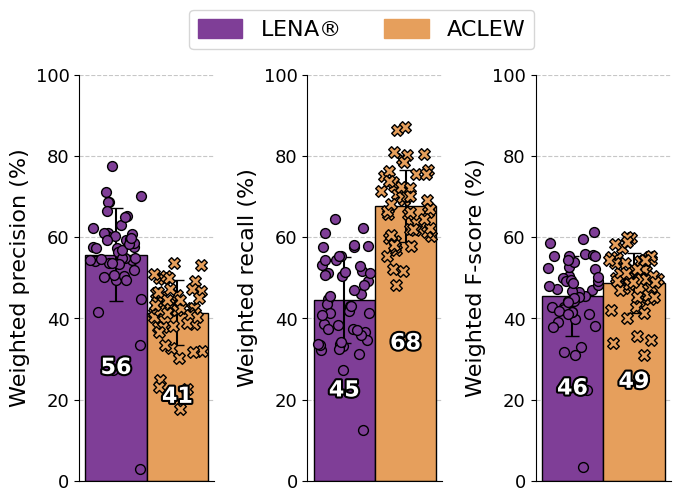

In [48]:
# SEGMENTATION SCORES
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.patheffects as path_effects

matplotlib.rcParams.update({'font.size': 16, 'legend.handleheight': 1, 'hatch.linewidth': 1.0,
                          'lines.markersize': 10, 'lines.linewidth': 2, 'errorbar.capsize': 5,
                           'xtick.labelsize': 13, 'ytick.labelsize': 13})

cm = 1/2.54


lena_color = '#7F3E97'
aclew_color = '#E69F5C' 
metric_name = ['Weighted precision (%)', 'Weighted recall (%)', 'Weighted F-score (%)']
def plot_corpus_metrics(fscore_lena, fscore_vtc):
    metrics = ['weighted_precision', 'weighted_recall', 'weighted_fscore']
    fig_width = 6 * len(metrics)
    fig, axes = plt.subplots(1, len(metrics), figsize=(fig_width*cm, 12*cm))
    width = 0.35
    jitter_width = 0.15
    alpha = 1
    
    # Get means and stds for each metric at corpus level
    lena_means = [fscore_lena[f'{m}'].mean() for m in metrics]
    lena_stds = [fscore_lena[f'{m}'].std() for m in metrics]
    vtc_means = [fscore_vtc[f'{m}'].mean() for m in metrics]
    vtc_stds = [fscore_vtc[f'{m}'].std() for m in metrics]

    print("LENA ACLEW")
    for lena_score, vtc_score in zip(lena_means, vtc_means):
        print("%.1f %.1f" % (lena_score, vtc_score))
    
    # Create each subplot
    for i, (metric, ax) in enumerate(zip(metrics, axes)):
        # Plot bars with error bars
        print("lena", lena_means)
        ax.bar(-width/2, 
               lena_means[i], 
               width, 
               yerr=lena_stds[i],
               label='LENA', 
               color=lena_color, 
               edgecolor='black',
               alpha=alpha,
               zorder=2,
               error_kw=dict(ecolor='black', elinewidth=1.5, capsize=5, capthick=1))
        print("vtc", vtc_means)
        ax.bar(width/2, 
               vtc_means[i], 
               width,
               yerr=vtc_stds[i],
               label='ACLEW', 
               color=aclew_color, 
               edgecolor='black',
               alpha=alpha,
               zorder=2,
               error_kw=dict(ecolor='black', elinewidth=1.5, capsize=5, capthick=1))
        
        # Add scatter points for individual measurements
        # LENA scatter points
        jitter = np.random.uniform(-jitter_width, jitter_width, size=len(fscore_lena))
        ax.scatter([-width/2 + j for j in jitter], 
                  fscore_lena[metric],
                  color=lena_color,
                  edgecolor='black',
                  s=50,
                  zorder=3)
        
        # ACLEW scatter points
        jitter = np.random.uniform(-jitter_width, jitter_width, size=len(fscore_vtc))
        ax.scatter([width/2 + j for j in jitter], 
                  fscore_vtc[metric],
                  color=aclew_color,
                  edgecolor='black',
                  s=70,
                  marker='X',
                  zorder=3)
        
        ax.set_xticks([])
        ax.set_ylabel(metric_name[i])
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', alpha=0.7, zorder=0)
        
        # Add value labels on top of bars
        for x, value in [(-width/2, lena_means[i]), (width/2, vtc_means[i])]:
            text = ax.text(x, value/2, f'{value:.0f}', 
                    ha='center', va='center', color='white', 
                    weight='bold', zorder=3, size=16)
            # Add black outline to make text more visible
            text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    handles = [plt.Rectangle((0,0),1,1, color=lena_color),  plt.Rectangle((0,0),1,1, color=aclew_color)]
    labels = [r'LENA$\circledR$', r'ACLEW']
    fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.53, 1.03), loc='center')
    plt.tight_layout()
    return fig, axes

fig, axes = plot_corpus_metrics(fscore_lena, fscore_vtc)
plt.savefig('/home/engaclew/neurogen/figures/30mn/segmentation_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
results_folder = Path('/home/engaclew/neurogen/results/agreement')
kappa_lena = pd.read_csv(results_folder / 'its_eaf_an1' / 'kappa_30mn_clips.csv')
kappa_vtc = pd.read_csv(results_folder / 'vtc_eaf_an1' / 'kappa_30mn_clips.csv')
kappa_lena['kappa'] = (kappa_lena['kappa_CHI']+kappa_lena['kappa_OCH']+kappa_lena['kappa_MAL']+kappa_lena['kappa_FEM'])/4
kappa_vtc['kappa'] = (kappa_vtc['kappa_CHI']+kappa_vtc['kappa_OCH']+kappa_vtc['kappa_MAL']+kappa_vtc['kappa_FEM'])/4

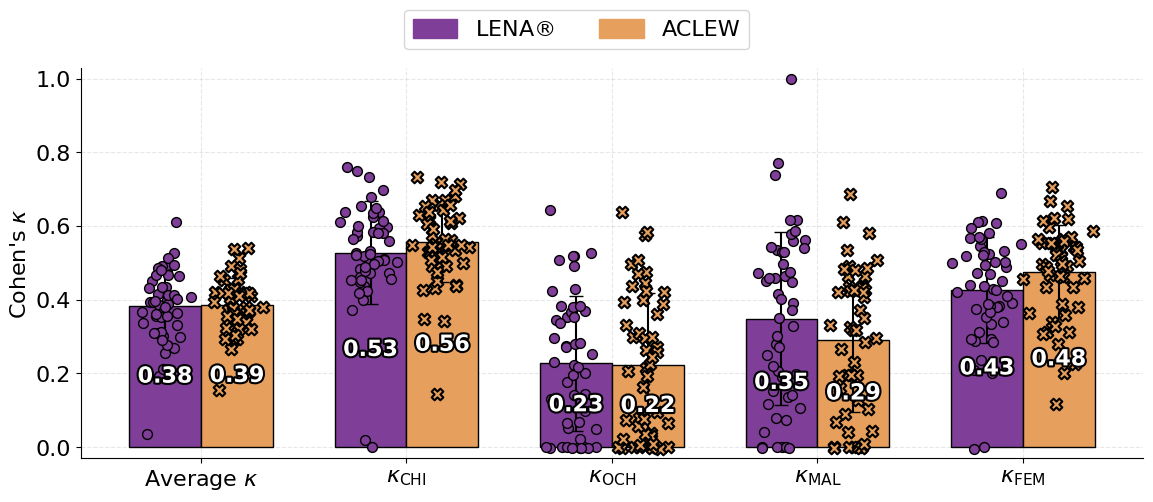

In [42]:
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 16, 'legend.handleheight': 1, 'hatch.linewidth': 1.0,
                          'lines.markersize': 10, 'lines.linewidth': 2, 'errorbar.capsize': 5,
                           'xtick.labelsize': 16, 'ytick.labelsize': 16})

def plot_kappa_metrics(kappa_lena, kappa_vtc):
    cm = 1/2.54
    lena_color = '#7F3E97'
    aclew_color = '#E69F5C'
    alpha = 1
    
    metric_name = ['Average $\kappa$', r'$\kappa_{\text{CHI}}$', r'$\kappa_{\text{OCH}}$', 
                   r'$\kappa_{\text{MAL}}$', r'$\kappa_{\text{FEM}}$']
    metrics = ['kappa', 'kappa_CHI', 'kappa_OCH', 'kappa_MAL', 'kappa_FEM']
    
    x = np.arange(len(metrics))
    width = 0.35
    
    lena_means = [kappa_lena[m].mean() for m in metrics]
    lena_stds = [kappa_lena[m].std() for m in metrics]
    vtc_means = [kappa_vtc[m].mean() for m in metrics]
    vtc_stds = [kappa_vtc[m].std() for m in metrics]
    
    fig_width = 6 * len(metrics)
    fig, ax = plt.subplots(1, 1, figsize=(fig_width*cm, 12*cm))
    
    error_props = dict(ecolor='black', elinewidth=1.5, capsize=5, capthick=1)
    
    # Plot bars
    ax.bar(x - width/2, lena_means, width, 
           yerr=lena_stds,
           label='LENA', 
           color=lena_color,
           edgecolor='black',
           alpha=alpha,
           zorder=2,
           error_kw=error_props)
           
    ax.bar(x + width/2, vtc_means, width,
           yerr=vtc_stds,
           label='ACLEW', 
           color=aclew_color,
           edgecolor='black',
           alpha=alpha,
           zorder=2,
           error_kw=error_props)
    
    # Add scatter points
    for i, metric in enumerate(metrics):
        lena_data = kappa_lena[metric]
        vtc_data = kappa_vtc[metric]
        
        jitter = width/6
        x_jitter = np.random.normal(0, jitter, size=len(lena_data))
        
        # LENA scatter points
        ax.scatter(x[i]-width/2 + x_jitter, lena_data, 
                  color=lena_color,
                  edgecolor='black',
                  s=50,
                  linewidth=1,
                  zorder=3)
        
        # ACLEW scatter points
        ax.scatter(x[i]+width/2 + x_jitter, vtc_data, 
                  color=aclew_color,
                  edgecolor='black',
                  s=70,
                  marker='X',
                  linewidth=1.5,
                  zorder=3)
    
    # Add value labels in middle of bars
    for i, (lena_mean, vtc_mean) in enumerate(zip(lena_means, vtc_means)):
        # LENA value
        text = ax.text(i - width/2, lena_mean/2, 
                f'{lena_mean:.2f}',
                ha='center',
                va='center',
                color='white',
                weight='bold',
                zorder=3,
                size=16)
        text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
        
        # ACLEW value
        text = ax.text(i + width/2, vtc_mean/2,
                f'{vtc_mean:.2f}',
                ha='center',
                va='center',
                color='white',
                weight='bold',
                zorder=3,
                size=16)
        text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
    
    ax.set_ylabel("Cohen's $\kappa$")
    ax.set_ylim(-0.03, 1.03)
    ax.set_xticks(x)
    ax.set_xticklabels(metric_name)
    ax.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    handles = [plt.Rectangle((0,0),1,1, color=lena_color), plt.Rectangle((0,0),1,1, color=aclew_color)]
    labels = [r'LENA$\circledR$', r'ACLEW']
    fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.5, 1.03), loc='center', frameon=True)
    
    plt.tight_layout()
    return fig, ax

plot_kappa_metrics(kappa_lena, kappa_vtc)
plt.savefig('/home/engaclew/neurogen/figures/30mn/lena_vtc_kappa.png', dpi=300)
plt.show()


In [5]:
from scipy import stats

def add_group_significance_bars(ax, df, groups, col):
    def get_stars(p_value):
        if p_value < 0.001:
            return '***'
        elif p_value < 0.01:
            return '**'
        elif p_value < 0.05:
            return '*'
        return ''
    
    # Get y-axis range
    ymin, ymax = ax.get_ylim()
    ydist = ymax - ymin
    
    # Calculate relative spacings
    stars_spacing = 0.01 * ydist  # Space between bar and stars
    bar_spacing = 0.07 * ydist    # Space between multiple bars
    tick_height = 0.02 * ydist    # Length of vertical ticks
    base_height = ymax + (0.05 * ydist)  # Starting height above plot
    
    # Perform statistical tests against low_risk group
    control_group = 'low_risk'
    control_data = df[df['group_id'] == control_group][col]
    
    # Calculate spacing in axes coordinates
    trans = ax.transAxes.inverted()
    x_positions = range(len(groups))
    
    sig_count = 0
    
    for i, group in enumerate(groups[1:], 1):
        if group in df['group_id'].unique():
            test_data = df[df['group_id'] == group][col]
            
            # Perform Mann-Whitney U test
            statistic, p_value = stats.mannwhitneyu(
                control_data, 
                test_data,
                alternative='two-sided'
            )
            
            # Only add bars for significant results
            stars = get_stars(p_value)
            if stars:
                current_height = base_height + (sig_count * bar_spacing)
                sig_count += 1
                
                # Draw the bar
                ax.plot(
                    [0, i],
                    [current_height, current_height],
                    'k-',
                    linewidth=1,
                    transform=ax.transData,
                    clip_on=False
                )
                
                # Add vertical ticks
                ax.plot(
                    [0, 0],
                    [current_height - tick_height, current_height],
                    'k-',
                    linewidth=1,
                    clip_on=False
                )
                ax.plot(
                    [i, i],
                    [current_height - tick_height, current_height],
                    'k-',
                    linewidth=1,
                    clip_on=False
                )
                
                # Add stars
                ax.text(
                    (0 + i) / 2,
                    current_height + stars_spacing,  # Using relative spacing
                    stars,
                    ha='center',
                    va='center',
                    fontsize=12,
                    clip_on=False
                )
    
    # Maintain original y-axis limits
    ax.set_ylim(ymin, ymax)
    ax.set_clip_on(False)

/tmp/ipykernel_10810/3691436320.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('group_id')[fscore_col].mean().reindex(groups, fill_value=0)
/tmp/ipykernel_10810/3691436320.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('group_id')[fscore_col].std().reindex(groups, fill_value=0)


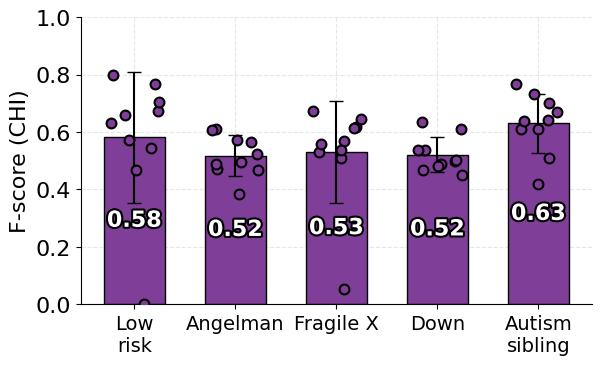

/tmp/ipykernel_10810/3691436320.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('group_id')[fscore_col].mean().reindex(groups, fill_value=0)
/tmp/ipykernel_10810/3691436320.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('group_id')[fscore_col].std().reindex(groups, fill_value=0)


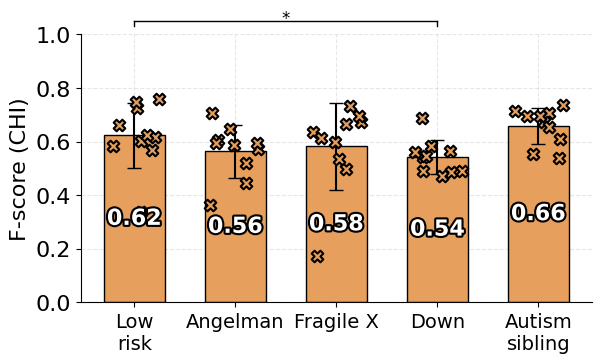

/tmp/ipykernel_10810/3691436320.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('group_id')[fscore_col].mean().reindex(groups, fill_value=0)
/tmp/ipykernel_10810/3691436320.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('group_id')[fscore_col].std().reindex(groups, fill_value=0)


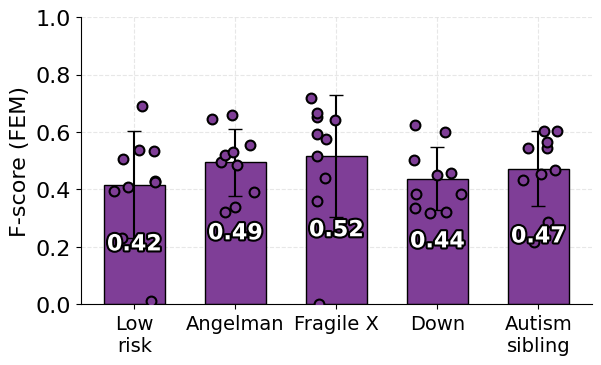

/tmp/ipykernel_10810/3691436320.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('group_id')[fscore_col].mean().reindex(groups, fill_value=0)
/tmp/ipykernel_10810/3691436320.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('group_id')[fscore_col].std().reindex(groups, fill_value=0)


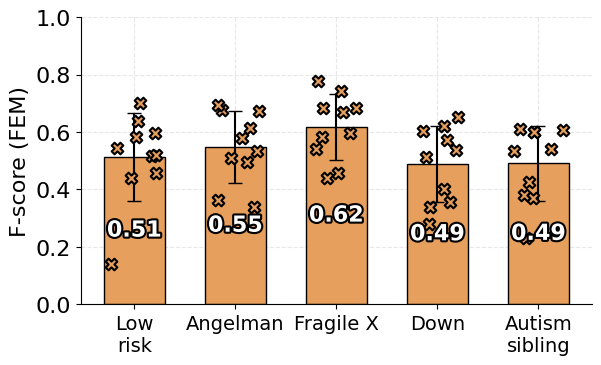

In [6]:
def plot_fscore_by_group(df, color, marker, cat='CHI'):
    if cat not in ['CHI', 'FEM', 'MAL', 'OCH']:
        raise ValueError("cat must be either 'CHI' or 'FEM'")
        
    fscore_col = f'fscore_{cat}'
    
    jitter_width = 0.25
    alpha = 1
    size = 50
    if marker == 'X':
        size = 70
    cm = 1/2.54
    
    label_name = {
        'low_risk': 'Low\nrisk',
        'angelman_syndrome': 'Angelman',
        'fragile_x_syndrome': 'Fragile X',
        'down_syndrome': 'Down',
        'autism_sibling': 'Autism\nsibling'
    }
    
    groups = list(label_name.keys())
    available_groups = df['group_id'].unique()
    
    # Calculate statistics
    means = df.groupby('group_id')[fscore_col].mean().reindex(groups, fill_value=0)
    stds = df.groupby('group_id')[fscore_col].std().reindex(groups, fill_value=0)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(16*cm, 10*cm))
    
    x = np.arange(len(groups))
    width = 0.6
    
    # Create bars
    bars = ax.bar(x, means, width,
                 yerr=stds,
                 color=color,
                 alpha=alpha,
                 zorder=2,
                 edgecolor='black',
                 error_kw=dict(ecolor='black', elinewidth=1.5, capsize=5, capthick=1))
    
    # Add individual points
    for i, group in enumerate(groups):
        if group in available_groups:
            group_data = df[df['group_id'] == group][fscore_col]
            jitter = np.random.uniform(-jitter_width, jitter_width, size=len(group_data))
            ax.scatter(x[i] + jitter, group_data, 
                      color=color,
                      edgecolor='black',
                      s=size,
                      marker=marker,
                      linewidth=1.5,
                      zorder=3)
    
    # Add value labels in middle of bars
    for i, mean_val in enumerate(means):
        if mean_val > 0:  # Only add label if there's a bar
            # Position text at half the bar height
            y_pos = mean_val / 2
            
            text = ax.text(i, y_pos, 
                    f'{mean_val:.2f}',
                    ha='center',
                    va='center',
                    color='white',
                    weight='bold',
                    zorder=3,
                    size=16)
            text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
    
    # Customize plot
    ax.set_ylabel(f'F-score ({cat})')  # Changed from kappa to F-score
    ax.set_ylim(0, 1.0)
    ax.set_xticks(x)
    ax.set_xticklabels([label_name[g] for g in groups], rotation=0, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    add_group_significance_bars(ax, df, groups, fscore_col)
    plt.tight_layout()
    return fig, ax

plot_fscore_by_group(fscore_lena, color=lena_color, marker='o', cat='CHI')
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/lena_fscore_CHI.png', dpi=300)
plt.show()
plot_fscore_by_group(fscore_vtc, color=aclew_color, marker='X', cat='CHI')
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/vtc_fscore_CHI.png', dpi=300)
plt.show()
plot_fscore_by_group(fscore_lena, color=lena_color, marker='o', cat='FEM')
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/lena_fscore_FEM.png', dpi=300)
plt.show()
plot_fscore_by_group(fscore_vtc, color=aclew_color, marker='X', cat='FEM')
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/vtc_fscore_FEM.png', dpi=300)
plt.show()



In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
results_folder = Path('/home/engaclew/neurogen/results/pyannote_metrics')

# Load f-score
fscore_lena = pd.read_csv(results_folder / 'its_eaf_an1' / 'fscore_30mn_clips.csv')
fscore_vtc = pd.read_csv(results_folder / 'vtc_eaf_an1' / 'fscore_30mn_clips.csv')
# Order
desired_order = ['low_risk', 'angelman_syndrome', 'fragile_x_syndrome', 'down_syndrome', 'autism_sibling']
fscore_lena['group_id'] = pd.Categorical(fscore_lena['group_id'], categories=desired_order, ordered=True)
fscore_vtc['group_id'] = pd.Categorical(fscore_vtc['group_id'], categories=desired_order, ordered=True)
fscore_lena = fscore_lena.sort_values('group_id')
fscore_vtc = fscore_vtc.sort_values('group_id')

print('Computing on %d chunks' % len(fscore_lena))
def compute_fscore(fscore_data):
    speakers = ['CHI', 'FEM', 'MAL', 'OCH']
    for speaker in speakers:
        # Precision = 1 if retrieved == 0 (all retrieved instances are correct since there was no retrieve instances
        fscore_data[f'precision_{speaker}'] = np.where(
            fscore_data[f'retrieved_{speaker}'] == 0,
            1,
            fscore_data[f'relevant retrieved_{speaker}'] / fscore_data[f'retrieved_{speaker}']
        )
    
        # Recall = 1 if relevant is 0 (all actual instances have been found since there was no example)
        fscore_data[f'recall_{speaker}'] = np.where(
            (fscore_data[f'relevant_{speaker}'] == 0),
            1,
            fscore_data[f'relevant retrieved_{speaker}'] / fscore_data[f'relevant_{speaker}']
        )
    
        # F-score calculation
        numerator = 2 * fscore_data[f'precision_{speaker}'] * fscore_data[f'recall_{speaker}']
        denominator = fscore_data[f'precision_{speaker}'] + fscore_data[f'recall_{speaker}']
        fscore_data[f'fscore_{speaker}'] = np.where(denominator != 0, numerator / denominator, 0)

    total_duration = (fscore_data['relevant_CHI'] + fscore_data['relevant_OCH'] + 
                 fscore_data['relevant_FEM'] + fscore_data['relevant_MAL'])

    total_global_duration = fscore_data[['relevant_CHI', 'relevant_OCH', 'relevant_FEM', 'relevant_MAL']].sum().sum()
    global_weights = {spk: fscore_data[f'relevant_{spk}'].sum() / total_global_duration for spk in speakers}
    print(f'Weights: {global_weights}')
    for metric in ['precision', 'recall', 'fscore']:
        fscore_data[f'weighted_{metric}'] = 100*sum(
                fscore_data[f'{metric}_{spk}'] * global_weights[spk] 
                for spk in speakers
            )
        fscore_data[metric] = 100 * fscore_data[[f'{metric}_{spk}' for spk in speakers]].mean(axis=1)
    return fscore_data

fscore_lena = compute_fscore(fscore_lena)
fscore_vtc = compute_fscore(fscore_vtc)

# Get human measures
DATA_PATH = Path('/home/engaclew/neurogen')
human_measures = pd.read_csv(DATA_PATH / 'human_measures_chunks.csv').fillna(0)
children = pd.read_csv(DATA_PATH / 'data/L3_HIPAA_LENA_cleaned/metadata/children.csv')
recordings = pd.read_csv(DATA_PATH / 'data/L3_HIPAA_LENA_cleaned/metadata/recordings.csv')
recordings_data = recordings.merge(children, on='child_id')[['group_id', 'recording_filename']]
human_measures = human_measures.merge(recordings_data, how='left', on='recording_filename')
def group_measures(data):
    if 'can_voc_CHI' in data.columns and 'non_can_voc_CHI' in data.columns:
        data['CVC'] = data['can_voc_CHI'] + data['non_can_voc_CHI']
    data = data.groupby('recording_filename').agg({
        '5s_CTC': np.sum,
        'voc_dur_chi': np.sum,
        'voc_chi': np.sum,
        'avg_voc_dur_chi': np.mean,
        'wc_adu': np.sum,
        'CVC': np.sum,
        'group_id': 'first',
        'child_id': 'first'
    }).reset_index()
    return data

human_measures = group_measures(human_measures)
fscore_vtc = fscore_vtc.merge(human_measures, left_on='recording_id', right_on='recording_filename', suffixes=('', '_human'))
fscore_lena = fscore_lena.merge(human_measures, left_on='recording_id', right_on='recording_filename', suffixes=('', '_human'))
print(fscore_vtc.columns)

Computing on 50 chunks
Weights: {'CHI': 0.33640247011535235, 'FEM': 0.4095326945285813, 'MAL': 0.12025165816238573, 'OCH': 0.13381317719368058}
Weights: {'CHI': 0.33640247011535235, 'FEM': 0.4095326945285813, 'MAL': 0.12025165816238573, 'OCH': 0.13381317719368058}
Index(['recording_id', 'group_id', 'retrieved_CHI', 'relevant_CHI',
       'relevant retrieved_CHI', 'fscore_CHI', 'retrieved_OCH', 'relevant_OCH',
       'relevant retrieved_OCH', 'fscore_OCH', 'retrieved_FEM', 'relevant_FEM',
       'relevant retrieved_FEM', 'fscore_FEM', 'retrieved_MAL', 'relevant_MAL',
       'relevant retrieved_MAL', 'fscore_MAL', 'precision_CHI', 'recall_CHI',
       'precision_FEM', 'recall_FEM', 'precision_MAL', 'recall_MAL',
       'precision_OCH', 'recall_OCH', 'weighted_precision', 'precision',
       'weighted_recall', 'recall', 'weighted_fscore', 'fscore',
       'recording_filename', '5s_CTC', 'voc_dur_chi', 'voc_chi',
       'avg_voc_dur_chi', 'wc_adu', 'CVC', 'group_id_human', 'child_id'],
   

/tmp/ipykernel_17464/584640840.py:66: FutureWarning: The provided callable <function sum at 0x7e9e005f80d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data = data.groupby('recording_filename').agg({
/tmp/ipykernel_17464/584640840.py:66: FutureWarning: The provided callable <function sum at 0x7e9e005f80d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data = data.groupby('recording_filename').agg({
/tmp/ipykernel_17464/584640840.py:66: FutureWarning: The provided callable <function mean at 0x7e9e005f9000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data = data.groupby('recording_filename').agg({


Text(0.5, 1.0, 'F-score vs Average Vocalization Duration by Group')

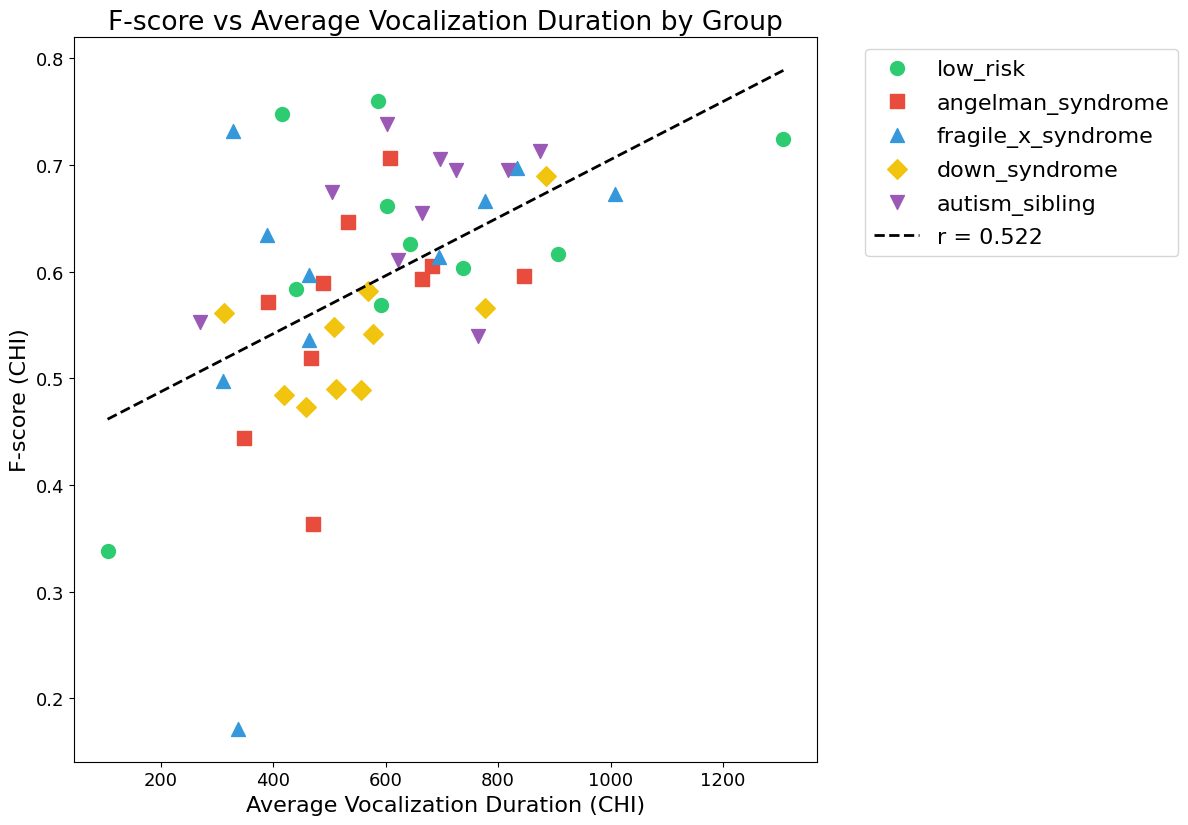

In [50]:
markers = {
    'low_risk': 'o',           # circle
    'angelman_syndrome': 's',   # square
    'fragile_x_syndrome': '^',  # triangle up
    'down_syndrome': 'D',       # diamond
    'autism_sibling': 'v'       # triangle down
}

colors = {
    'low_risk': '#2ecc71',         # green
    'angelman_syndrome': '#e74c3c', # red
    'fragile_x_syndrome': '#3498db',# blue
    'down_syndrome': '#f1c40f',     # yellow
    'autism_sibling': '#9b59b6'     # purple
}

plt.figure(figsize=(12, 8))

# Plot scatter points for each group
for group in markers.keys():
    mask = fscore_vtc['group_id'] == group
    plt.scatter(
        fscore_vtc.loc[mask, 'avg_voc_dur_chi'],
        fscore_vtc.loc[mask, 'fscore_CHI'],
        marker=markers[group],
        c=colors[group],
        label=group,
        s=100
    )

# Calculate and plot single regression line for all data
x = fscore_vtc['avg_voc_dur_chi']
y = fscore_vtc['fscore_CHI']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create regression line points
line_x = np.array([min(x), max(x)])
line_y = slope * line_x + intercept

# Plot the regression line
plt.plot(line_x, line_y, 'k--', label=f'r = {r_value:.3f}')

# Add legend to the right of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent legend cutoff
plt.tight_layout()

plt.xlabel('Average Vocalization Duration (CHI)')
plt.ylabel('F-score (CHI)')
plt.title('F-score vs Average Vocalization Duration by Group')

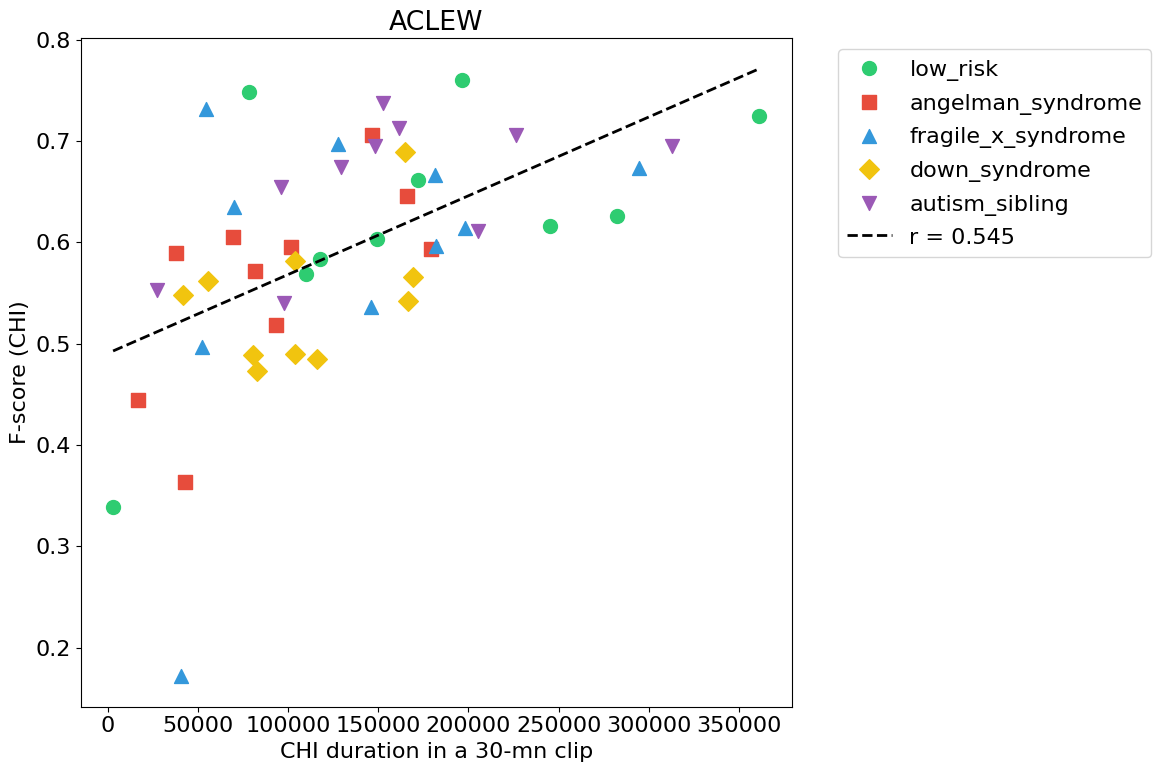

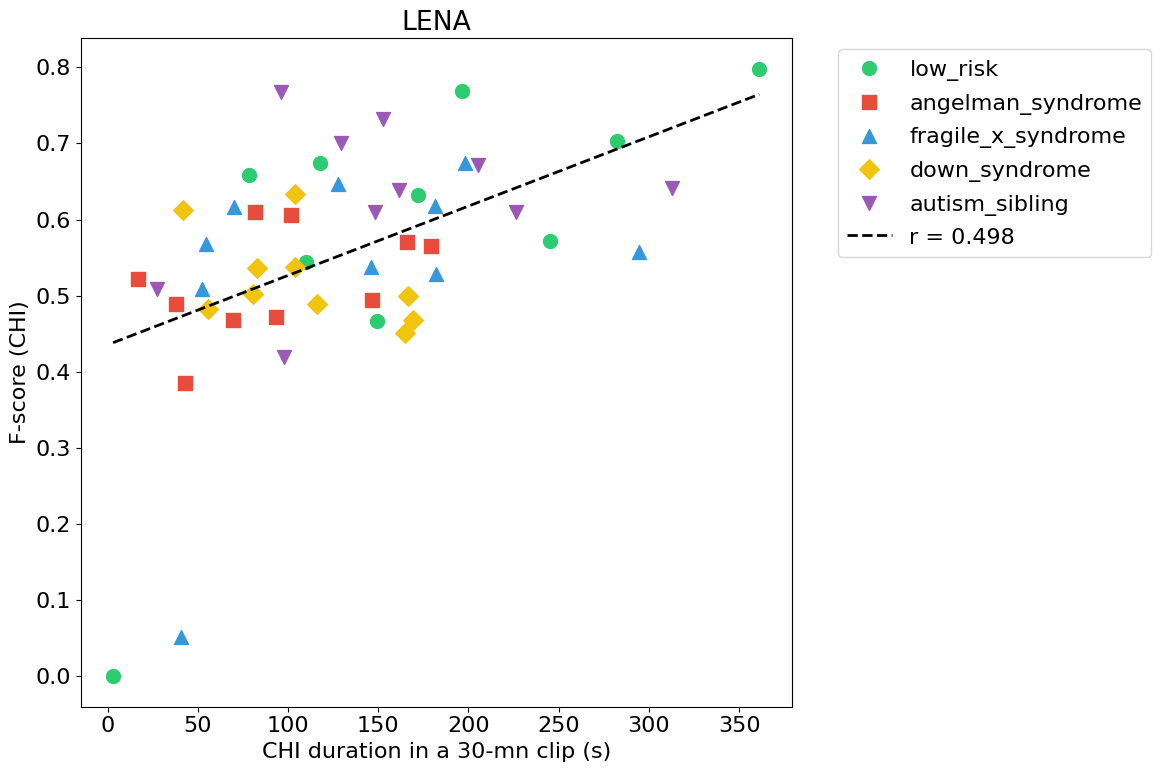

In [9]:
import numpy as np
from scipy import stats

# Create dictionaries for markers and colors
markers = {
    'low_risk': 'o',           # circle
    'angelman_syndrome': 's',   # square
    'fragile_x_syndrome': '^',  # triangle up
    'down_syndrome': 'D',       # diamond
    'autism_sibling': 'v'       # triangle down
}

colors = {
    'low_risk': '#2ecc71',         # green
    'angelman_syndrome': '#e74c3c', # red
    'fragile_x_syndrome': '#3498db',# blue
    'down_syndrome': '#f1c40f',     # yellow
    'autism_sibling': '#9b59b6'     # purple
}

# ACLEW Plot
plt.figure(figsize=(12, 8))

# Plot scatter points for each group - ACLEW
for group in markers.keys():
    mask = fscore_vtc['group_id'] == group
    plt.scatter(
        fscore_vtc.loc[mask, 'voc_dur_chi'],
        fscore_vtc.loc[mask, 'fscore_CHI'],
        marker=markers[group],
        c=colors[group],
        label=group,
        s=100
    )

# Calculate and plot regression line - ACLEW
x_aclew = fscore_vtc['voc_dur_chi']
y_aclew = fscore_vtc['fscore_CHI']
slope_aclew, intercept_aclew, r_value_aclew, p_value_aclew, std_err_aclew = stats.linregress(x_aclew, y_aclew)

line_x_aclew = np.array([min(x_aclew), max(x_aclew)])
line_y_aclew = slope_aclew * line_x_aclew + intercept_aclew

plt.plot(line_x_aclew, line_y_aclew, 'k--', label=f'r = {r_value_aclew:.3f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('CHI duration in a 30-mn clip')
plt.ylabel('F-score (CHI)')
plt.title('ACLEW')
plt.tight_layout()
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/aclew_cum_dur_as_fscore_chi.png', dpi=300)
plt.show()

# LENA Plot
plt.figure(figsize=(12, 8))

# Plot scatter points for each group - LENA
for group in markers.keys():
    mask = fscore_lena['group_id'] == group
    x = fscore_lena.loc[mask, 'voc_dur_chi'] / 1000
    y = fscore_lena.loc[mask, 'fscore_CHI']
    plt.scatter(
        x,
        y,
        marker=markers[group],
        c=colors[group],
        label=group,
        s=100
    )

# Calculate and plot regression line - LENA
x_lena = fscore_lena['voc_dur_chi']/1000
y_lena = fscore_lena['fscore_CHI']
slope_lena, intercept_lena, r_value_lena, p_value_lena, std_err_lena = stats.linregress(x_lena, y_lena)

line_x_lena = np.array([min(x_lena), max(x_lena)])
line_y_lena = slope_lena * line_x_lena + intercept_lena

plt.plot(line_x_lena, line_y_lena, 'k--', label=f'r = {r_value_lena:.3f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('CHI duration in a 30-mn clip (s)')
plt.ylabel('F-score (CHI)')
plt.title('LENA')
plt.tight_layout()
plt.savefig('/home/engaclew/neurogen/figures/30mn_group/lena_cum_dur_as_fscore_chi.png', dpi=300)
plt.show()

In [3]:
# IDER
from pathlib import Path
import pandas as pd
import numpy as np
results_folder = Path('/home/engaclew/neurogen/results/pyannote_metrics')

# Load ider
ider_vtc = pd.read_csv(results_folder / 'vtc_eaf_an1' / 'ider_30mn_clips.csv')
ider_lena = pd.read_csv(results_folder / 'its_eaf_an1' / 'ider_30mn_clips.csv')

def compute_ider(ider_df):
    ider_df['missed detection'] = 100*ider_df['missed detection'] / ider_df['total']
    ider_df['false alarm'] = 100*ider_df['false alarm'] / ider_df['total']
    ider_df['confusion'] = 100*ider_df['confusion'] / ider_df['total']
    ider_df['correct'] = 100*ider_df['correct'] / ider_df['total']
    ider_df['ider'] = 100*ider_df['ider']
    return ider_df

ider_vtc = compute_ider(ider_vtc)
ider_lena = compute_ider(ider_lena)
print(ider_vtc.head())

                   recording_id            group_id     total  confusion  \
0  20190828_145547_024884_2.wav   angelman_syndrome  704804.0  11.928990   
1  20211022_110857_045737_2.wav  fragile_x_syndrome  221757.0   6.710498   
2    20180808_110630_024879.wav            low_risk  362680.0  12.445131   
3  20221129_154915_045733_1.wav  fragile_x_syndrome  467407.0  16.546393   
4  20230110_120835_024882_2.wav      autism_sibling  239206.0  10.019398   

     correct  missed detection  false alarm        ider  
0  80.625677          7.445332    68.673277   88.047599  
1  79.763435         13.526067    40.867256   61.103821  
2  76.555641         10.999228    85.632789  109.077148  
3  73.613361          9.840246    70.621321   97.007961  
4  83.609107          6.371496   124.368118  140.759011  


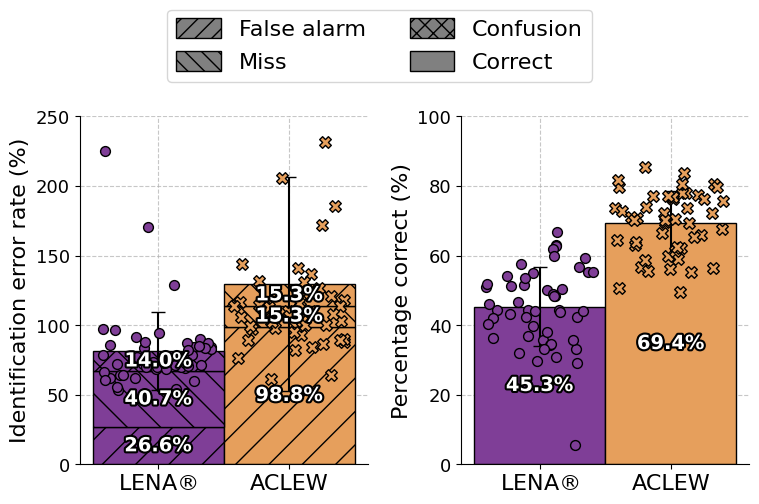

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patheffects as path_effects
import numpy as np

matplotlib.rcParams.update({'font.size': 16, 'legend.handleheight': 1, 'hatch.linewidth': 1.0,
                          'lines.markersize': 10, 'lines.linewidth': 2, 'errorbar.capsize': 5,
                           'xtick.labelsize': 13, 'ytick.labelsize': 13})

cm = 1/2.54

def plot_identification_errors(ider_lena, ider_vtc):
    lena_color = '#7F3E97'
    aclew_color = '#E69F5C'
    fontsize=14
    # Calculate means
    lena_means = {
        'false_alarm': ider_lena['false alarm'].mean(),
        'miss': ider_lena['missed detection'].mean(),
        'confusion': ider_lena['confusion'].mean(),
        'correct': ider_lena['correct'].mean()
    }
    
    vtc_means = {
        'false_alarm': ider_vtc['false alarm'].mean(),
        'miss': ider_vtc['missed detection'].mean(),
        'confusion': ider_vtc['confusion'].mean(),
        'correct': ider_vtc['correct'].mean()
    }
    
    error_types = ['false_alarm', 'miss', 'confusion']
    patterns = ['/', '\\', 'x']
    lena_errors = [lena_means[et] for et in error_types]
    vtc_errors = [vtc_means[et] for et in error_types]
    
    fig = plt.figure(figsize=(20*cm, 12*cm))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    width = 0.35
    
    # First subplot - Error rates
    ax1.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    bottom_lena = 0
    bottom_vtc = 0
    for i, error_type in enumerate(error_types):
        ax1.bar(-width/2, lena_errors[i], width, 
               bottom=bottom_lena,
               color=lena_color, edgecolor='black',
               hatch=patterns[i], zorder=2)
        ax1.bar(width/2, vtc_errors[i], width,
               bottom=bottom_vtc,
               color=aclew_color, edgecolor='black',
               hatch=patterns[i], zorder=2)
        
        if lena_errors[i] > 5:
            text = ax1.text(-width/2, bottom_lena + lena_errors[i]/2, 
                    f'{lena_errors[i]:.1f}%', 
                    ha='center', va='center', color='white', 
                    weight='bold', size=fontsize, zorder=4)
            text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
            
        if vtc_errors[i] > 5:
            text = ax1.text(width/2, bottom_vtc + vtc_errors[i]/2, 
                    f'{vtc_errors[i]:.1f}%', 
                    ha='center', va='center', color='white', 
                    weight='bold', size=fontsize, zorder=4)
            text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
        
        bottom_lena += lena_errors[i]
        bottom_vtc += vtc_errors[i]
    
    # Add individual points with jitter and std errors for error rates
    jitter_width = 0.15
    lena_ider_mean = ider_lena['ider'].mean()
    lena_ider_std = ider_lena['ider'].std()
    vtc_ider_mean = ider_vtc['ider'].mean()
    vtc_ider_std = ider_vtc['ider'].std()
    
    jitter = np.random.uniform(-jitter_width, jitter_width, size=len(ider_lena))
    ax1.scatter([-width/2 + j for j in jitter], ider_lena['ider'],
               color=lena_color, edgecolor='black',
               s=50, zorder=3)
    ax1.errorbar(-width/2, lena_ider_mean, yerr=lena_ider_std,
                color='black', elinewidth=1.5, capsize=5, capthick=1, zorder=2)
    
    jitter = np.random.uniform(-jitter_width, jitter_width, size=len(ider_vtc))
    ax1.scatter([width/2 + j for j in jitter], ider_vtc['ider'],
               color=aclew_color, edgecolor='black',
               s=70, marker='X', zorder=3)
    ax1.errorbar(width/2, vtc_ider_mean, yerr=vtc_ider_std,
                color='black', elinewidth=1.5, capsize=5, capthick=1, zorder=2)
                
    
    ax1.set_xticks([-width/2, width/2])
    ax1.set_xticklabels([r'LENA$\circledR$', r'ACLEW'], fontsize=16)
    labels = ax1.get_xticklabels()
    labels[1].set_c('white')  # Set the entire label white, then reset the main text
    labels[1].set_text(r'ACLEW$^\circledR$')
    labels[1].set_c('black')
  
    ax1.set_ylabel('Identification error rate (%)')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Second subplot - Correct percentage
    ax2.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    # Plot bars for correct percentage
    ax2.bar(-width/2, lena_means['correct'], width,
            color=lena_color, edgecolor='black', zorder=2)
    ax2.bar(width/2, vtc_means['correct'], width,
            color=aclew_color, edgecolor='black', zorder=2)
    
    # Add individual points with jitter and std errors for correct percentage
    lena_correct_mean = ider_lena['correct'].mean()
    lena_correct_std = ider_lena['correct'].std()
    vtc_correct_mean = ider_vtc['correct'].mean()
    vtc_correct_std = ider_vtc['correct'].std()
    
    jitter = np.random.uniform(-jitter_width, jitter_width, size=len(ider_lena))
    ax2.scatter([-width/2 + j for j in jitter], ider_lena['correct'],
               color=lena_color, edgecolor='black',
               s=50, zorder=3)
    ax2.errorbar(-width/2, lena_correct_mean, yerr=lena_correct_std,
                color='black', elinewidth=1.5, capsize=5, capthick=1, zorder=2)
    
    jitter = np.random.uniform(-jitter_width, jitter_width, size=len(ider_vtc))
    ax2.scatter([width/2 + j for j in jitter], ider_vtc['correct'],
               color=aclew_color, edgecolor='black',
               s=70, marker='X', zorder=3)
    ax2.errorbar(width/2, vtc_correct_mean, yerr=vtc_correct_std,
                color='black', elinewidth=1.5, capsize=5, capthick=1, zorder=2)
           
    # Add percentage labels
    text = ax2.text(-width/2, lena_means['correct']/2,
            f'{lena_means["correct"]:.1f}%',
            ha='center', va='center', color='white',
            weight='bold', size=fontsize, zorder=4)
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
    
    text = ax2.text(width/2, vtc_means['correct']/2,
            f'{vtc_means["correct"]:.1f}%',
            ha='center', va='center', color='white',
            weight='bold', size=fontsize, zorder=4)
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
    
    ax2.set_xticks([-width/2, width/2])
    ax2.set_xticklabels([r'LENA$\circledR$', r'ACLEW'], fontsize=16)
    ax2.set_ylabel('Percentage correct (%)')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # Set independent y-axis limits
    ax1.set_ylim(0, max(ider_lena['ider'].max(), ider_vtc['ider'].max()) + 10)  # +10 for label space
    ax2.set_ylim(0, 100) 
    
    # Legend
    handles = [
        plt.Rectangle((0,0),1,1, facecolor='gray', edgecolor='black', hatch='//'),
        plt.Rectangle((0,0),1,1, facecolor='gray', edgecolor='black', hatch='\\\\'),
        plt.Rectangle((0,0),1,1, facecolor='gray', edgecolor='black', hatch='xx'),
        plt.Rectangle((0,0),1,1, facecolor='gray', edgecolor='black')
    ]
    labels = ['False alarm', 'Miss', 'Confusion', 'Correct']
    
    fig.legend(handles, labels, 
              bbox_to_anchor=(0.5, 1.0),
              loc='center',
              ncol=2,
              handlelength=2,
              handleheight=1)
    ax1.set_ylim(0, 250)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    return fig, (ax1, ax2)

# Usage:
fig, (ax1, ax2) = plot_identification_errors(ider_lena, ider_vtc)
plt.savefig('/home/engaclew/neurogen/figures/30mn/ider.png', dpi=300, bbox_inches='tight')

plt.show()


In [14]:
print(ider_lena.sort_values(by='ider', ascending=False)[['ider', 'false alarm']])

          ider  false alarm
10  224.900489   130.459235
44  170.362172   132.208303
34  128.862520    58.604700
43   96.925494    37.120744
29   96.266656    34.289322
17   94.589717    29.273767
27   91.116194    30.950074
18   90.035536    32.348386
26   87.584431    19.541042
36   87.162438    35.546510
38   87.103569    16.289595
22   85.484302    29.900761
46   84.856640    21.784152
16   84.396105    18.681538
13   84.084513    20.270891
41   83.862755    17.061061
21   83.567915    16.577745
23   83.023332    27.154781
48   82.026598    17.730724
47   78.367288    38.371973
20   78.292186     9.085711
5    77.497124    13.095069
39   77.387265    29.166882
33   77.357026    21.350543
2    76.825576    23.546653
30   75.849609    20.203711
6    73.836763    25.311498
31   72.866650    15.273499
28   72.787234    15.868631
32   72.335358    14.298734
11   71.770385    17.940865
12   71.557868    22.728374
45   71.171295    19.551616
40   70.540349    24.687409
14   69.776356    20

In [35]:
print(ider_vtc['false alarm'].min(), ider_vtc['false alarm'].max())
print(ider_lena['false alarm'].min(), ider_lena['false alarm'].max())

40.867255599597755 483.61486820999266
5.817150956768249 132.20830349380932


In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors
lena_color = '#7F3E97'
aclew_color = '#E69F5C'

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(6, 1), dpi=300, 
                       facecolor='white',  # Explicitly set white background
                       edgecolor='black',  # Add border
                       linewidth=1)  # Border width

# Create handles using colored rectangles
handles = [
    plt.Rectangle((0,0),1,1, color=lena_color),
    plt.Rectangle((0,0),1,1, color=aclew_color)
]

# Labels
labels = ['LENA', 'ACLEW']

# Create legend
legend = plt.legend(handles, labels, 
                    ncol=2,  
                    loc='center',
                    frameon=True)

# Remove axes
plt.axis('off')

# Adjust subplot parameters to remove internal padding
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the figure with tight bounding box and white background
plt.savefig('/home/engaclew/neurogen/figures/legend.png', 
            bbox_inches='tight',
            dpi=800,
            pad_inches=0,
            facecolor='white',  # Ensure white background
            edgecolor='none')  # No extra edge

plt.close()